# INF 8215 - Intelligence artif.: méthodes et algorithmes 
## Automne 2018 - TP3 - Machine Learning
## Data processing tutorial with pandas and scikit-learn

## Déroulement du pré-traitement des données

Le but de la suite de ce TP est de vous faire une version simplifiée d'un projet complet de machine learning:

1. Nettoyage des données, traitement des valeurs manquantes
2. Mise en forme des données pour pouvoir les utiliser dans les algorithmes de machine learning
3. Feature engineering transformation ou combinaisons de features entre elles
4. Comparaison des performances des différents choix effectués lors du traitement des données


## Scikit-learn
http://scikit-learn.org/stable/

Il s'agit d'une bibliothèque de machine learning et data mining, elle propose des outils pour l'analyse et le traitement des données,  des algorithmes classiques de machine learning comme les réseaux de neuronnes, la régression logistique, les SVM ou autre, enfin des outils permettant de comparer les modèles entre eux comme la cross validation.

## Pandas

Une bibliothèque permettant de stocker des données et de les manipuler facilement

Les deux éléments de base de pandas sont le dataframe et la serie.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

#### Quelques commandes utiles

Soit **df** un DataFrame
* **pd.read_csv(filename)** permet de charger les données depuis un csv
* **df.head()** permet d'afficher les 5 premières lignes d'un dataframe
* **df.info()** permet d'afficher des informations par colonne du dataframe
* **df = pd.DataFrame(data, columns = [name1,...,namen])** permet de créer un DataFrame en spécifiant le nom des colonnes
* ** df = df.drop(columns = [name1,...,namen])** permet de supprimer les colonnes dont le nom est mentionné dans le tableau
* ** df = pd.concat([df1,df2], axis = 1)** permet de concatener deux dataset dans le sens des colonnes

* **df = df.astype(float)** permet de transformer le type des données du dataframe en float

* ** df.corr()** permet d'obtenir la matrice de corrélation d'un dataframe colonne par colonne

## Data leakage

Comme mentionné dans la partie **train/test set**, quand on transforme les données, il faut apprendre les transformations sur l'ensemble d'entraînement et pas sur l'ensemble de test.

Par exemple, admettons que l'on veuille appliquer du **one-hot-encoding** sur une **feature** de type **catégorique** (ensemble de valeurs discrètes).

Si quand on applique l'algorithme sur l'ensemble de test, on tombe sur une nouvelle catégorie qui n'était pas dans l'ensemble d'entraînement, il ne faut pas créer une nouvelle catégorie dans l'algorithme de **one-hot-encoding**. Sinon le **pipeline** d'entraînement dispose de données sur l'ensemble de test, c'est la **fuite de données** ou **data leakage**

Une solution est d'avoir au préalable ajouté une classe "inconnue" lors de l'entraînement.

## Types de features et transformations usuelles associées avec sklearn

Pour présenter les transformations usuelles avec sklearn, nous allons utiliser un exemple basique. Créons un DataFrame, contenant trois features(colonnes):
* Une catégorique textuelle (un ensemble discret de valeurs discrètes sous forme de texte)
* Une catégorique numérique ( un ensemble discret de valeurs entières)
* Deux numériques continues ( n'importe quel nombre réel)

In [1]:
import numpy as np
import pandas as pd

toy_data = [["certainly yes",1,np.nan,2153.5],
            ["maybe yes",1,0.5,5361.2],
            ["certainly no",3,6.3,6945.3],
            [np.nan,2,2.1,3215.2],
            ["certainly yes",np.nan,0.12,9856.1],
            ["maybe yes",1,6.9,4561.2],
            ["maybe no",np.nan,13.0,9453.7],
            ["certainly yes",np.nan,0.23,3125.0],
            ["maybe yes",3,5.2,2547.4,],
            ["maybe no",np.nan,2.0,np.nan],
           ]
column_names = ["textual","categorical","numerical_small","numerical_high"]
toy_dataframe = pd.DataFrame(toy_data, columns = column_names)

##### Séparation en ensemble d'entraînement et de test

In [2]:
from sklearn.model_selection import train_test_split
toy_train, toy_test= train_test_split(toy_dataframe, test_size=0.2, random_state=42)
toy_train,toy_test = toy_train.reset_index(drop = True), toy_test.reset_index(drop = True)

In [3]:
toy_train.head(10)

,textual,categorical,numerical_small,numerical_high
0,maybe yes,1.0,6.90,4561.2
1,certainly yes,1.0,NaN,2153.5
2,certainly yes,NaN,0.23,3125.0
3,certainly no,3.0,6.30,6945.3
4,maybe no,NaN,2.00,NaN
5,certainly yes,NaN,0.12,9856.1
6,NaN,2.0,2.10,3215.2
7,maybe no,NaN,13.00,9453.7


In [4]:
toy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
textual            7 non-null object
categorical        4 non-null float64
numerical_small    7 non-null float64
numerical_high     7 non-null float64
dtypes: float64(3), object(1)
memory usage: 336.0+ bytes


Comme vous pouvez l'observer, ce dataframe n'est pas utilisable tel quel avec des algorithmes classiques de machine learning.
Les principaux problèmes sont les suivants:
* Les colonnes contiennent des valeurs nulles (NaN)
* La première colonne est sous forme de texte
* Les deux dernières colonnes sont non normalisées. 
* La deuxième colonne n'est pas encodée sous le format one-hot

##### Importance de la normalisation
La normalisation permet d'exprimer la colonne sous-forme d'une distribution normale centrée en 0 et de variance 1, c'est-à-dire des valeurs comprises entre -1 et 1. L'intérêt de réduire ainsi les features est de les mettre toutes **à la même échelle**. En effet, certains algorithmes de classification auront tendance à considérer la colonne **numerical_small** comme négligeable par rapport à la colonne **numerical_high**, et ainsi à l'**ignorer lors de l'apprentissage**.

##### Importance du one-hot-encoding

Une feature catégorique peut prendre un nombre restreint de valeurs entières. Par exemple la colonne **categorical** contient des valeurs dans l'ensemble [1,2,3].
La sémantique derrière cette représentation est la suivante: à chaque exemple(ligne) du dataset, on associe une catégorie parmi les catégories possibles ([1,2,3]).

Néanmoins, certains algorithmes de machine learning auront tendance à prendre en compte l'ordre numérique de ces catégories.
C'est-à-dire prendre en compte le fait que 2 est après 1, alors que cette relation ne fait pas de sens dans ce cas là.
Pour pallier à ce problème, on utilise le one-hot-encoding vu dans la première partie.

Ainsi, on remplacera une feature catégorique pouvant prendre 3 valeurs différentes, par 3 features catégoriques pouvant prendre les valeurs 0 ou 1.

##### Valeurs manquantes
Pour les valeurs manquantes, on peut utiliser l'objet SimpleImputer de sklearn.
SimpleImputer est un objet de type **transformer**, il est munis de deux méthodes:
* fit: permet d'apprendre la transformation à effectuer
* transform: permet d'appliquer la transformation à effectuer
* fit_transform: applique les deux méthodes précédentes à la suite

**Remarque: pour éviter la fuite de donnée, on utilise fit_transfom sur l'ensemble d'entrainement et transform sur l'ensemble de test (cf l'exemple suivant **

In [5]:
from sklearn.impute import SimpleImputer

# Imputers initialisation
textual_imputer = SimpleImputer(strategy = 'constant', fill_value = 'maybe yes')
categorical_imputer = SimpleImputer(strategy = 'constant', fill_value = 1.0)
small_imputer = SimpleImputer(strategy = 'mean')
high_imputer = SimpleImputer(strategy = 'mean')

In [6]:
#Train set
toy_train["textual"] = textual_imputer.fit_transform(toy_train["textual"].values.reshape(-1,1))
toy_train["categorical"] = categorical_imputer.fit_transform(toy_train["categorical"].values.reshape(-1,1))
toy_train["numerical_small"] = small_imputer.fit_transform(toy_train["numerical_small"].values.reshape(-1,1))
toy_train["numerical_high"] = high_imputer.fit_transform(toy_train["numerical_high"].values.reshape(-1,1))

In [7]:
#Test set
toy_test["textual"] = textual_imputer.transform(toy_test["textual"].values.reshape(-1,1))
toy_test["categorical"] = categorical_imputer.transform(toy_test["categorical"].values.reshape(-1,1))
toy_test["numerical_small"] = small_imputer.transform(toy_test["numerical_small"].values.reshape(-1,1))
toy_test["numerical_high"] = high_imputer.transform(toy_test["numerical_high"].values.reshape(-1,1))

In [8]:
toy_train.head()

,textual,categorical,numerical_small,numerical_high
0,maybe yes,1.0,6.900000,4561.200000
1,certainly yes,1.0,4.378571,2153.500000
2,certainly yes,1.0,0.230000,3125.000000
3,certainly no,3.0,6.300000,6945.300000
4,maybe no,1.0,2.000000,5615.714286


#### Transformation des features

##### Textual

Cette commande pandas permet d'observer les différentes valeurs possibles pour une feature, ainsi que leur proportion

In [9]:
(toy_train["textual"].value_counts()/len(toy_train))[:10]

certainly yes    0.375
maybe yes        0.250
maybe no         0.250
certainly no     0.125
Name: textual, dtype: float64

En observant la distribution des valeurs prises par cette colonne, plusieurs décisions peuvent être prises:
* Exprimer cette variable comme une variable catégorique pouvant prendre les valeurs [0,1,2,3].
* Séparer la colonne en deux colonnes, **certain** et **positif** chacune pouvant prendre les valeurs [0,1].

Dans le cadre de la démonstration, nous choisirons la deuxième option.

Il est possible de définir nous-même des fonctions à appliquer sur une colonne. On utilise ensuite la méthode **apply** du dataframe combinée à l'utilisation de **lambda expression**.

In [10]:
#Custom functions
def parse_certain(text):
    certain, _ = text.split(" ")
    return certain

def parse_positif(text):
    _, positif = text.split(" ")
    return positif

In [11]:
# Train set
certain_train = toy_train.apply(lambda row: pd.Series(  parse_certain(row["textual"])  ), axis = 1  )
positif_train = toy_train.apply(lambda row: pd.Series(  parse_positif(row["textual"])  ), axis = 1  )

certain_train.columns = ["certain"]
positif_train.columns = ["positif"]

new_columns = pd.concat([certain_train,positif_train], axis = 1)
toy_train = toy_train.drop(columns = ["textual"])
toy_train = pd.concat([toy_train,pd.DataFrame(new_columns)], axis = 1)

# Test set
certain_test = toy_test.apply(lambda row: pd.Series(  parse_certain(row["textual"])  ), axis = 1  )
positif_test = toy_test.apply(lambda row: pd.Series(  parse_positif(row["textual"])  ), axis = 1  )

certain_test.columns = ["certain"]
positif_test.columns = ["positif"]

new_columns = pd.concat([certain_test,positif_test], axis = 1)
toy_test = toy_test.drop(columns = ["textual"])
toy_test = pd.concat([toy_test,pd.DataFrame(new_columns)], axis = 1)

In [12]:
toy_train.head()

,categorical,numerical_small,numerical_high,certain,positif
0,1.0,6.900000,4561.200000,maybe,yes
1,1.0,4.378571,2153.500000,certainly,yes
2,1.0,0.230000,3125.000000,certainly,yes
3,3.0,6.300000,6945.300000,certainly,no
4,1.0,2.000000,5615.714286,maybe,no


#### Label encoder

La transformation a fonctionné, cependant les deux nouvelles colonnes ne sont toujours pas exploitables dans un algorithme de machine learning. Le **LabelEncoder** de sklearn permet de convertir ces colonnes en colonnes catégoriques numériques.

In [13]:
from sklearn.preprocessing import LabelEncoder

# encoder initialisation
certain_label = LabelEncoder()
positif_label = LabelEncoder()


#Train set
toy_train["certain"] = certain_label.fit_transform(toy_train["certain"].values)
toy_train["positif"] = positif_label.fit_transform(toy_train["positif"].values)

#Test set
toy_test["certain"] = certain_label.transform(toy_test["certain"].values.reshape(-1,1))
toy_test["positif"] = positif_label.transform(toy_test["positif"].values.reshape(-1,1))

/home/paul/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
toy_train.head()

,categorical,numerical_small,numerical_high,certain,positif
0,1.0,6.900000,4561.200000,1,1
1,1.0,4.378571,2153.500000,0,1
2,1.0,0.230000,3125.000000,0,1
3,3.0,6.300000,6945.300000,0,0
4,1.0,2.000000,5615.714286,1,0


##### Categorical

Pour cette colonne, nous allons uniquement appliquer le one-hot-encoding.

In [15]:
from sklearn.preprocessing import OneHotEncoder

# encoder initialisation
categorical_encoder = OneHotEncoder(categories = 'auto', sparse = False)

#Train set
new_columns_train = categorical_encoder.fit_transform(toy_train["categorical"].values.reshape(-1,1))
toy_train = toy_train.drop(columns=["categorical"])
toy_train = pd.concat([toy_train,pd.DataFrame(new_columns_train)], axis = 1)


#Test set
new_columns_test = categorical_encoder.transform(toy_test["categorical"].values.reshape(-1,1))

toy_test = toy_test.drop(columns=["categorical"])
toy_test = pd.concat([toy_test,pd.DataFrame(new_columns_test)], axis = 1)



##### Numerical small et Numerical high

Pour ces colonnes nous allons nous contenter de les normaliser.

In [16]:
from sklearn.preprocessing import StandardScaler

# Scalers initialisation
small_scaler = StandardScaler()
high_scaler = StandardScaler()

#Train set
toy_train["numerical_small"] = small_scaler.fit_transform(toy_train["numerical_small"].values.reshape(-1,1))
toy_train["numerical_high"] = high_scaler.fit_transform(toy_train["numerical_high"].values.reshape(-1,1))

#Test set
toy_test["numerical_small"] = small_scaler.transform(toy_test["numerical_small"].values.reshape(-1,1))
toy_test["numerical_high"] = high_scaler.transform(toy_test["numerical_high"].values.reshape(-1,1))

In [17]:
toy_train.head()

,numerical_small,numerical_high,certain,positif,0,1,2
0,0.624113,-3.865262e-01,1,1,1.0,0.0,0.0
1,0.000000,-1.269055e+00,0,1,1.0,0.0,0.0
2,-1.026869,-9.129572e-01,0,1,1.0,0.0,0.0
3,0.475599,4.873521e-01,0,0,0.0,0.0,1.0
4,-0.588752,-3.333701e-16,1,0,1.0,0.0,0.0


## Pipeline

Le dataset résultant est utilisable pour l'apprentissage, et comme nous avons appliqué les transformations sur l'ensemble de test nous pouvons évaluer les performances de l'Algorithme sur ce dernier.

Cependant, l'implémentation actuelle est fastidieuse et redondante. En effet, elle nécessite beaucoup de copier-coller. 

D'autre part, si on voulait effectuer une modification dans le processus de traitement des données et tester son impact sur la performance, il faudrait tout relancer manuellement sans rien oublier.

Une solution existe dans **sklearn** pour pallier à ce problème, le **pipeline**.

Il permet de lister la liste des transformations par colonne et de les appliquer en une seule fois.

Ci-dessous, le même prétraitement des données mais cette fois en utilisant le pipeline.

In [18]:
from preprocessing import TransformationWrapper
from preprocessing import LabelEncoderP
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

#textual
pipeline_certain = Pipeline([
    ('certain', TransformationWrapper(transformation = parse_certain)),
    ("encode",LabelEncoderP()),
])

pipeline_positif = Pipeline([
    ('positif', TransformationWrapper(transformation = parse_positif)),
    ("encode",LabelEncoderP()),
    
])

pipeline_textual_u = Pipeline([
    ("textual", SimpleImputer(strategy = 'constant', fill_value = 'maybe yes')),
    
    ('feats', FeatureUnion([
        ('certain', pipeline_certain), 
        ('positif', pipeline_positif) 
    ])),

])

# categorical
pipeline_categorical = Pipeline([
    ("fillna", SimpleImputer(strategy = 'constant', fill_value = 1.0) ),
    ("encode",OneHotEncoder(categories = 'auto', sparse = False))
])

# numerical
pipeline_numerical = Pipeline([
    ("fillna", SimpleImputer(strategy = 'mean') ),
    ("scaler",StandardScaler())
])

full_pipeline = ColumnTransformer([
        ("textual", pipeline_textual_u, ["textual"]),
        ("categorical", pipeline_categorical, ["categorical"]),
        ("numerical small", pipeline_numerical, ["numerical_small"]),
        ("numerical high", pipeline_numerical, ["numerical_high"]),
    ])

In [19]:
toy_test

,numerical_small,numerical_high,certain,positif,0,1,2
0,0.203323,-1.124673,1,1,0.0,0.0,1.0
1,-0.960038,-0.093291,1,1,1.0,0.0,0.0


In [20]:
toy_train, toy_test= train_test_split(toy_dataframe, test_size=0.2, random_state=42)
toy_train,toy_test = toy_train.reset_index(drop = True), toy_test.reset_index(drop = True)

In [21]:
columns = ["certain","positif","cat0", "cat1","cat2","numerical small","numerical high"]

toy_train = pd.DataFrame(full_pipeline.fit_transform(toy_train),columns= columns)
toy_test = pd.DataFrame(full_pipeline.transform(toy_test),columns= columns)

/home/paul/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/paul/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/paul/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
toy_train.head()

,certain,positif,cat0,cat1,cat2,numerical small,numerical high
0,1.0,1.0,1.0,0.0,0.0,0.624113,-3.865262e-01
1,0.0,1.0,1.0,0.0,0.0,0.000000,-1.269055e+00
2,0.0,1.0,1.0,0.0,0.0,-1.026869,-9.129572e-01
3,0.0,0.0,0.0,0.0,1.0,0.475599,4.873521e-01
4,1.0,0.0,1.0,0.0,0.0,-0.588752,-3.333701e-16


Comme vous pouvez le remarquer, le code utilisant le pipeline est beaucoup plus compact et facile à modifier.
De plus il s'exécute en une ligne, en utilisant **pipeline.fit_transform()** et les transformations peuvent être appliquées en une ligne
sur l'ensemble de test sans fuite de donnée avec **pipeline.transform()**.

#### Explication du code du pipeline

##### Pipeline
Il s'agit d'une suite d'opérations. Chaque opération est représenté par un tuple de la forme:

**(transformation name, transformer(parameters))**

##### ColumnTransformer

Permet de sélectionner les colonnes sur lesquelles appliquer une transformation. La transformation peut être un transformer simple ou un pipeline. Il s'agit d'une suite de tuples de la forme:

**(transformation name, transformer(parameters) or pipeline_name, [columns to be transformed])**

##### TransformationWrapper
Il s'agit d'une classe implémentée spécifiquement pour le tp, elle permet d'appliquer des fonctions définies par l'utilisateur dans le pipeline.

Cet objet est un **transformer** , il est donc muni d'une méthode **fit** et d'une méthode **transform** comme chaque transformer de sklearn.

Il prend deux paramètres:
* **fitation**: la fonction utilisée pour apprendre la transformation à effectuer, elle prend en entrée un dataframe et renvoie une liste contenant les paramètres ou données apprises
* **transformation** : la fonction qui applique la transformation, **elle prend en entrée une ligne de colonne à traiter**, et renvoie la valeur résultante de la transformation. Optionnellement, elle peut prendre un deuxième argument en entrée, la liste renvoyée par la fonction donnée dans le paramètre **fitation**.

Par exemple: **("parse", TransformationWrapper(fitation = get_train_colors, transformation = parse_color))**

#####  LabelEncoderP

Dans sklearn 20.0 le transformer **LabelEncoder** présenté plus tôt dans le tutoriel est inutilisable dans le pipeline, **LabelEncoderP** est juste une surcharge qui permet d'utiliser ce transformer dans le pipeline.
Elle est munie des mêmes fonctionnalités.

## Observer les données

n premières lignes d'un DataFrame

In [23]:
toy_dataframe.head(5)

,textual,categorical,numerical_small,numerical_high
0,certainly yes,1.0,NaN,2153.5
1,maybe yes,1.0,0.50,5361.2
2,certainly no,3.0,6.30,6945.3
3,NaN,2.0,2.10,3215.2
4,certainly yes,NaN,0.12,9856.1


Types de données et valeurs manquantes par colonne

In [24]:
toy_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
textual            9 non-null object
categorical        6 non-null float64
numerical_small    9 non-null float64
numerical_high     9 non-null float64
dtypes: float64(3), object(1)
memory usage: 400.0+ bytes


Nombre de valeurs nulles par colonne

In [25]:
toy_dataframe.isnull().sum()

textual            1
categorical        4
numerical_small    1
numerical_high     1
dtype: int64

Valeurs différentes et nombre de valeurs différentes pour une colonne

In [26]:
(toy_dataframe["categorical"].value_counts())

1.0    3
3.0    2
2.0    1
Name: categorical, dtype: int64

Nombre de valeurs différentes pour une colonne

In [27]:
toy_dataframe["categorical"].nunique()

3

Afficher la distribution des données

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a0bc2a5c0>,
      dtype=object)

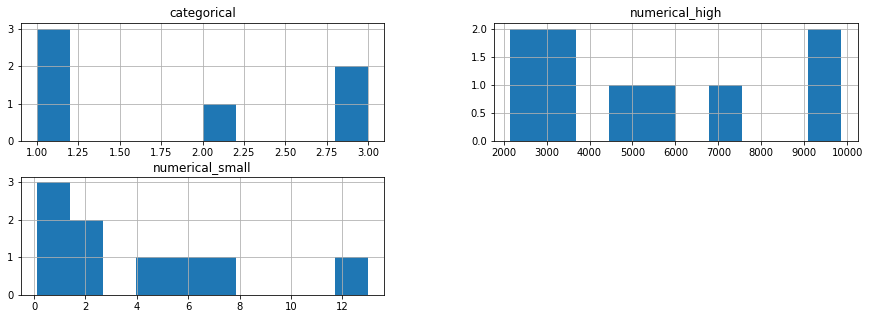

In [29]:
toy_dataframe.hist(figsize=(15,5))